In [1]:
# Importing libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
file = "hepatitis.csv"

# Assign colum names to the dataset
cols = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS','FATIGUE','MALAISE',
        'ANOREXIA','LIVERBIG','LIVERFIRM','SPLEENPALPABLE','SPIDERS',
        'ASCITES','VARICES','BILIRUBIN','ALKPHOSPHATE','SGOT','ALBUMIN',
        'PROTIME','HISTOLOGY']

In [3]:
# Read dataset to pandas dataframe
dataset = pd.read_csv(file, names=cols)
dataset.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVERBIG,LIVERFIRM,SPLEENPALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALKPHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.00,2.0,2.00,2.0
AGE,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
SEX,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
STEROID,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
ANTIVIRALS,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
FATIGUE,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
MALAISE,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
ANOREXIA,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
LIVERBIG,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
LIVERFIRM,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0


After deleting missing value (80, 20)


Text(0.5, 0, 'SGOT')

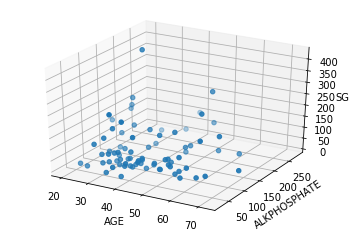

In [5]:
dataset = dataset.dropna() # Drop record having Nan
print("After deleting missing value", dataset.shape)
# Plotting dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['AGE'],dataset['ALKPHOSPHATE'],dataset['SGOT'])
ax.set_xlabel('AGE')
ax.set_ylabel('ALKPHOSPHATE')
ax.set_zlabel('SGOT')

In [6]:
# split our dataset into its attributes and labels
X = dataset.iloc[:, 1:].values  
y = dataset.iloc[:, 0].values

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# Feature Scaling (normalization)
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [9]:
# Training model
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 0, 'SGOT')

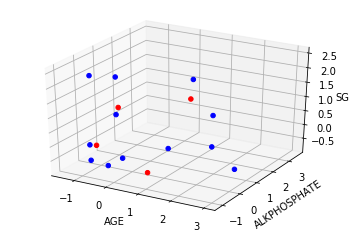

In [10]:
# Prediction testing data
y_pred = classifier.predict(X_test)

# plotting prediction result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[y_pred==1,0],X_test[y_pred==1,14],X_test[y_pred==1,15],c='r',alpha=1)
ax.scatter(X_test[y_pred==2,0],X_test[y_pred==2,14],X_test[y_pred==2,15],c='b',alpha=1)
ax.set_xlabel('AGE')
ax.set_ylabel('ALKPHOSPHATE')
ax.set_zlabel('SGOT')

In [11]:
# Evaluating algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0],(y_test != y_pred).sum()))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy: {:4.2f}%".format(accuracy_score(y_test,y_pred)*100))

Number of mislabeled points out of a total 16 points : 1
Confusion Matrix: 
[[ 3  0]
 [ 1 12]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.92      0.96        13

   micro avg       0.94      0.94      0.94        16
   macro avg       0.88      0.96      0.91        16
weighted avg       0.95      0.94      0.94        16

Accuracy: 93.75%


In [12]:
# Validating model with cross validation
from sklearn.model_selection import cross_val_score
fold = 10
scores = cross_val_score(classifier, X, y, cv=fold)
print("Accuracy for each iteration in {}-fold cross validation: ".format(fold))
for i in range(len(scores)):
    print("fold-{}\t{:6.2f}%".format(i+1,scores[i]*100))
print("Average Accuracy: {:6.2f}% (+/- {:4.2f})".format(scores.mean()*100, scores.std()**2 *100))

Accuracy for each iteration in 10-fold cross validation: 
fold-1	 77.78%
fold-2	 88.89%
fold-3	 88.89%
fold-4	 75.00%
fold-5	100.00%
fold-6	 75.00%
fold-7	 87.50%
fold-8	 71.43%
fold-9	 71.43%
fold-10	 71.43%
Average Accuracy:  80.73% (+/- 0.88)
